In [16]:
import pandas as pd
from pathlib import Path
import os

# paths
## set global dir
cwd=Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent) 
print(os.getcwd())
## create paths 
DATA_PATH = Path('data')



# analiza brudno 
## assign data paths
metadata_path = DATA_PATH / 'trajectory_length_vs_attractors/results/metadata.csv'
results_path = DATA_PATH / 'trajectory_length_vs_attractors/results/joined_results_trajectory_length_vs_attractors.csv' 

## metadata
### load metadata into df
metadata_df = pd.read_csv(
    metadata_path, 
    # del obsolete columns
    usecols=lambda x: x not in ['Unnamed: 0', 'attractor_ratio', 'success'],
    # set incorrectly read datatype (refe)
    dtype={
        "condition_id": str,
    })
### rename columns in meta data to obtain 
metadata_df['condition_id_name'] = metadata_df['condition_id']
metadata_df['condition_id_num'] = metadata_df['condition_id'].astype(int)
metadata_df = metadata_df.drop(columns=['condition_id'])

## results
### load results 
results_df = pd.read_csv(
    results_path,
    usecols = lambda x: x not in ["BIC"],
    )
### rename columns to match with meta data
results_df = results_df.rename(
    columns={
        "dataset": "condition_id_num",
        "score": "score_function"
        #TODO - should change score -> score_function (it is not clear)
    }
)
### add missing values

## merge 
### remove duplicates
results_df = results_df.drop(columns=['score_function'])
### merge be outer join
df = results_df.merge(metadata_df, how='outer', on='condition_id_num')
### TODO add missing metrics
# it takes all metrics, checks if there are in joined_dataset and add only those which are not and then return df with order that was given
metrics_list=['TP', 'FP', 'FN', 'precision', 'recall', 'sensitivity', 'AHD', 'SHD', 'EHD', 'SID']

# results
df['attractor_ratio'].max()

/home/maxi7524/repositories/SAD2_final_project


np.float64(1.0)

In [ ]:
common_metrics = list(set(df.columns).intersection(set(metrics_list)))
df.copy().drop(columns=common_metrics)
# common_metrics
df.copy()

,condition_id_num,dataset_succeeded,attractor_ratio,log_likelihood,MDL,BDe,num_nodes,update_mode,trajectory_length,n_trajectories,sampling_frequency,score_function,n_parents_per_node,rep_id,condition_id_name
0,0,False,0.914286,0.000000,0.000000,NaN,6,synchronous,10,60,3,MDL,"[2, 3, 4]",0,0000
1,1,False,0.881548,1542.602329,1588.746423,1100.760497,6,synchronous,10,60,3,MDL,"[2, 3, 4]",1,0001
2,2,False,0.891071,1045.829677,1115.045817,771.662141,6,synchronous,10,60,3,BDE,"[2, 3, 4]",0,0002
3,3,False,0.927381,1875.599810,1949.430360,1353.657919,6,synchronous,10,60,3,BDE,"[2, 3, 4]",1,0003
4,4,False,0.511310,1996.400474,2107.146298,1465.374812,6,asynchronous,10,60,3,MDL,"[2, 3, 4]",0,0004
5,5,False,0.484524,2512.479889,2581.696029,1793.400319,6,asynchronous,10,60,3,MDL,"[2, 3, 4]",1,0005
6,6,False,0.563690,2132.763829,2271.196109,1587.389205,6,asynchronous,10,60,3,BDE,"[2, 3, 4]",0,0006
7,7,False,0.336310,2547.564976,2695.226075,1883.869728,6,asynchronous,10,60,3,BDE,"[2, 3, 4]",1,0007
8,8,False,0.768214,3964.223799,4392.752523,3055.206077,10,synchronous,10,100,3,MDL,"[2, 3, 4]",0,0008
9,9,False,0.859286,4063.501534,4825.884032,3346.017480,10,synchronous,10,100,3,MDL,"[2, 3, 4]",1,0009


In [2]:
from sad2_final_project.analysis import add_missing_metrics_from_experiment

add_missing_metrics_from_experiment(df, DATA_PATH / 'MICHAŁ_METRICS',metrics_list=metrics_list)

{'TP': 0, 'FP': 0, 'FN': 18, 'recall': 0.0, 'sensitivity': 0.0, 'AHD': 0.6, 'SHD': 18, 'EHD': 15, 'SID': 0}
{'TP': 1, 'FP': 2, 'FN': 17, 'recall': 0.05555555555555555, 'sensitivity': 0.05555555555555555, 'AHD': 0.6333333333333333, 'SHD': 19, 'EHD': 18, 'SID': 0}
{'TP': 3, 'FP': 2, 'FN': 16, 'recall': 0.15789473684210525, 'sensitivity': 0.15789473684210525, 'AHD': 0.6, 'SHD': 18, 'EHD': 21, 'SID': 0}
{'TP': 5, 'FP': 0, 'FN': 14, 'recall': 0.2631578947368421, 'sensitivity': 0.2631578947368421, 'AHD': 0.4666666666666667, 'SHD': 14, 'EHD': 18, 'SID': 0}
{'TP': 9, 'FP': 2, 'FN': 11, 'recall': 0.45, 'sensitivity': 0.45, 'AHD': 0.43333333333333335, 'SHD': 13, 'EHD': 24, 'SID': 0}
{'TP': 6, 'FP': 1, 'FN': 13, 'recall': 0.3157894736842105, 'sensitivity': 0.3157894736842105, 'AHD': 0.4666666666666667, 'SHD': 14, 'EHD': 21, 'SID': 0}
{'TP': 6, 'FP': 5, 'FN': 8, 'recall': 0.42857142857142855, 'sensitivity': 0.42857142857142855, 'AHD': 0.43333333333333335, 'SHD': 13, 'EHD': 21, 'SID': 0}
{'TP': 11,

,condition_id_num,dataset_succeeded,attractor_ratio,TP,FP,FN,precision,recall,sensitivity,AHD,...,BDe,num_nodes,update_mode,trajectory_length,n_trajectories,sampling_frequency,score_function,n_parents_per_node,rep_id,condition_id_name
0,0,False,0.914286,0.0,0.0,18.0,0.000000,0.000000,0.000000,0.600000,...,NaN,6,synchronous,10,60,3,MDL,"[2, 3, 4]",0,0000
1,1,False,0.881548,1.0,2.0,17.0,0.333333,0.055556,0.055556,0.633333,...,1100.760497,6,synchronous,10,60,3,MDL,"[2, 3, 4]",1,0001
2,2,False,0.891071,3.0,2.0,16.0,0.600000,0.157895,0.157895,0.600000,...,771.662141,6,synchronous,10,60,3,BDE,"[2, 3, 4]",0,0002
3,3,False,0.927381,5.0,0.0,14.0,1.000000,0.263158,0.263158,0.466667,...,1353.657919,6,synchronous,10,60,3,BDE,"[2, 3, 4]",1,0003
4,4,False,0.511310,9.0,2.0,11.0,0.818182,0.450000,0.450000,0.433333,...,1465.374812,6,asynchronous,10,60,3,MDL,"[2, 3, 4]",0,0004
5,5,False,0.484524,6.0,1.0,13.0,0.857143,0.315789,0.315789,0.466667,...,1793.400319,6,asynchronous,10,60,3,MDL,"[2, 3, 4]",1,0005
6,6,False,0.563690,6.0,5.0,8.0,0.545455,0.428571,0.428571,0.433333,...,1587.389205,6,asynchronous,10,60,3,BDE,"[2, 3, 4]",0,0006
7,7,False,0.336310,11.0,2.0,7.0,0.846154,0.611111,0.611111,0.300000,...,1883.869728,6,asynchronous,10,60,3,BDE,"[2, 3, 4]",1,0007
8,8,False,0.768214,11.0,15.0,19.0,0.423077,0.366667,0.366667,0.377778,...,3055.206077,10,synchronous,10,100,3,MDL,"[2, 3, 4]",0,0008
9,9,False,0.859286,14.0,22.0,19.0,0.388889,0.424242,0.424242,0.455556,...,3346.017480,10,synchronous,10,100,3,MDL,"[2, 3, 4]",1,0009


In [17]:
df_summary = (
    df
    .groupby(["trajectory_length", "num_nodes"])
    .agg(
        median_ar=("attractor_ratio", "median"),
        q25_ar=("attractor_ratio", lambda x: x.quantile(0.25)),
        mean_ar=("attractor_ratio", "mean"),
        std_ar=("attractor_ratio", "std"),
        n=("attractor_ratio", "size")
    )
    .reset_index()
)

In [ ]:
df_summary["scale_ratio"] = (
    df_summary["trajectory_length"] / df_summary["num_nodes"]
)
df_summary

,trajectory_length,num_nodes,median_ar,q25_ar,mean_ar,std_ar,n,scale_ratio
0,10,5,0.876246,0.667560,0.785662,0.205530,600,2.000000
1,10,7,0.791190,0.491120,0.690165,0.273711,600,1.428571
2,10,9,0.698704,0.289782,0.594321,0.322780,600,1.111111
3,10,11,0.634766,0.168255,0.540005,0.350391,600,0.909091
4,10,13,0.551619,0.098029,0.486880,0.363200,600,0.769231
5,15,5,0.919281,0.800633,0.853411,0.164220,600,3.000000
6,15,7,0.860757,0.602486,0.756670,0.241930,600,2.142857
7,15,9,0.810556,0.460341,0.692933,0.280490,600,1.666667
8,15,11,0.768473,0.332034,0.637546,0.321061,600,1.363636
9,15,13,0.714176,0.199570,0.576234,0.355616,600,1.153846


<Axes: xlabel='scale_ratio', ylabel='median_ar'>

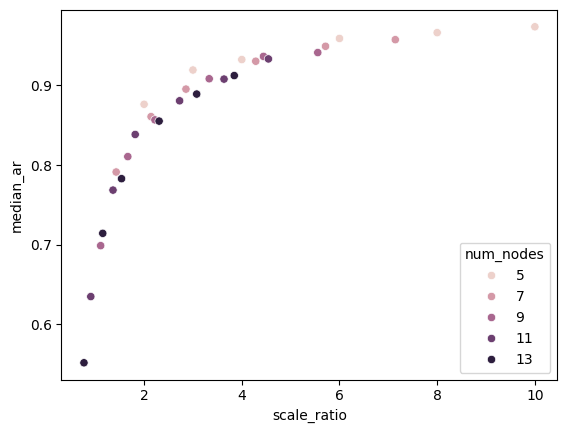

In [21]:
import seaborn as sns
sns.scatterplot(
    data=df_summary,
    x="scale_ratio",
    y="median_ar",
    hue="num_nodes"
)


<Axes: xlabel='trajectory_length', ylabel='num_nodes'>

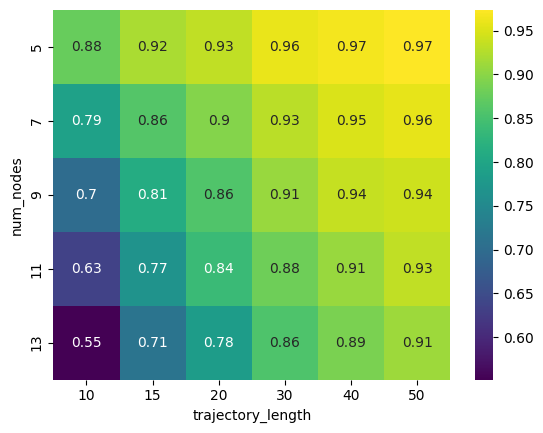

In [22]:
pivot = df_summary.pivot(
    index="num_nodes",
    columns="trajectory_length",
    values="median_ar"
)

sns.heatmap(pivot, cmap="viridis", annot=True)
